In [1]:
pip install pandas nltk matplotlib


Note: you may need to restart the kernel to use updated packages.


First few rows of the dataset:
                       file                                            message
0     allen-p/_sent_mail/1.  Message-ID: <18782981.1075855378110.JavaMail.e...
1    allen-p/_sent_mail/10.  Message-ID: <15464986.1075855378456.JavaMail.e...
2   allen-p/_sent_mail/100.  Message-ID: <24216240.1075855687451.JavaMail.e...
3  allen-p/_sent_mail/1000.  Message-ID: <13505866.1075863688222.JavaMail.e...
4  allen-p/_sent_mail/1001.  Message-ID: <30922949.1075863688243.JavaMail.e...
Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517401 entries, 0 to 517400
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   file     517401 non-null  object
 1   message  517401 non-null  object
dtypes: object(2)
memory usage: 7.9+ MB
None


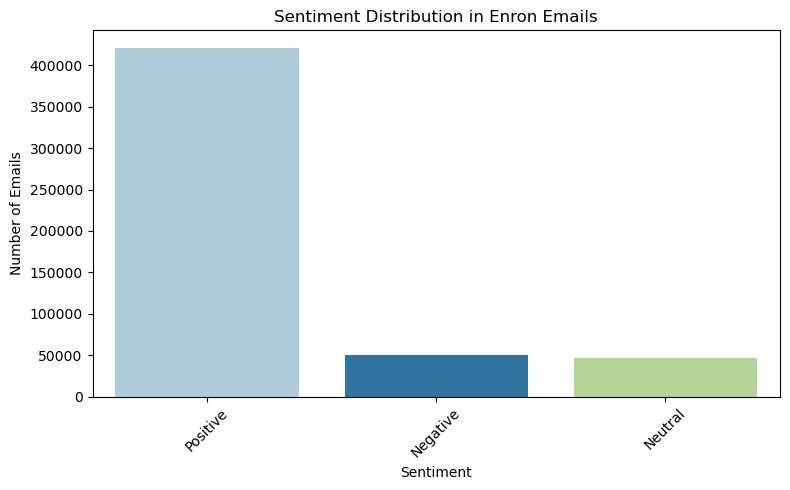

Sentiment analysis results saved to 'emails_with_sentiment.csv'


In [3]:
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import seaborn as sns


file_path = r"C:\Users\indah\emails.csv"  
emails_df = pd.read_csv(file_path)


print("First few rows of the dataset:")
print(emails_df.head())


print("Dataset info:")
print(emails_df.info())

# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Function to categorize the sentiment
def categorize_sentiment(text):
    score = sia.polarity_scores(text)['compound']
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


emails_df['sentiment'] = emails_df['message'].apply(categorize_sentiment)


sentiment_counts = emails_df['sentiment'].value_counts()


plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='Paired')
plt.title('Sentiment Distribution in Enron Emails')
plt.xlabel('Sentiment')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


emails_df.to_csv(r"C:\Users\indah\emails_with_sentiment.csv", index=False)
print("Sentiment analysis results saved to 'emails_with_sentiment.csv'")


In [5]:
from sklearn.feature_extraction.text import CountVectorizer


positive_messages = emails_df[emails_df['sentiment'] == 'Positive']['message']
negative_messages = emails_df[emails_df['sentiment'] == 'Negative']['message']
neutral_messages = emails_df[emails_df['sentiment'] == 'Neutral']['message']


def extract_keywords(messages):
    vectorizer = CountVectorizer(stop_words='english', max_features=20)
    X = vectorizer.fit_transform(messages)
    keywords = vectorizer.get_feature_names_out()
    return keywords


positive_keywords = extract_keywords(positive_messages)
negative_keywords = extract_keywords(negative_messages)
neutral_keywords = extract_keywords(neutral_messages)

print("Top Positive Keywords:", positive_keywords)
print("Top Negative Keywords:", negative_keywords)
print("Top Neutral Keywords:", neutral_keywords)


Top Positive Keywords: ['00' '20' '2000' '2001' 'bcc' 'cc' 'cn' 'com' 'content' 'date' 'ect'
 'enron' 'hou' 'id' 'message' 'na' 'ou' 'recipients' 'subject' 'version']
Top Negative Keywords: ['00' '20' '2001' 'bcc' 'cc' 'cn' 'com' 'content' 'date' 'ect' 'enron'
 'folder' 'id' 'message' 'na' 'ou' 'recipients' 'subject' 'type' 'version']
Top Neutral Keywords: ['00' '2001' 'bcc' 'cc' 'cn' 'com' 'content' 'date' 'enron' 'evans' 'id'
 'message' 'na' 'ou' 'recipients' 'subject' 'text' 'transfer' 'type'
 'version']


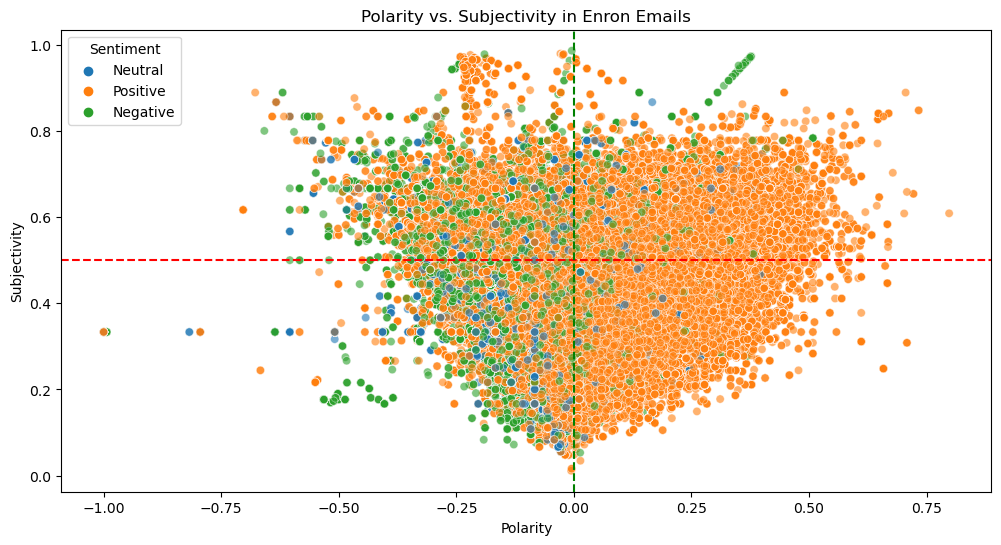

In [6]:
from textblob import TextBlob


def analyze_emotion(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity, blob.sentiment.subjectivity


emails_df[['polarity', 'subjectivity']] = emails_df['message'].apply(analyze_emotion).apply(pd.Series)


plt.figure(figsize=(12, 6))
sns.scatterplot(data=emails_df, x='polarity', y='subjectivity', hue='sentiment', alpha=0.6)
plt.title('Polarity vs. Subjectivity in Enron Emails')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.axhline(0.5, color='red', linestyle='--')  
plt.axvline(0, color='green', linestyle='--')  
plt.legend(title='Sentiment')
plt.show()


In [10]:
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk


nltk.download('vader_lexicon')


sia = SentimentIntensityAnalyzer()


def vader_sentiment_analysis(text):
    score = sia.polarity_scores(text)
    return score['compound'], score['pos'], score['neu'], score['neg']


emails_df[['vader_compound', 'vader_pos', 'vader_neu', 'vader_neg']] = emails_df['message'].apply(vader_sentiment_analysis).apply(pd.Series)


print(emails_df[['message', 'vader_compound', 'vader_pos', 'vader_neu', 'vader_neg']].head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\indah\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                                             message  vader_compound  \
0  Message-ID: <18782981.1075855378110.JavaMail.e...          0.0000   
1  Message-ID: <15464986.1075855378456.JavaMail.e...          0.9313   
2  Message-ID: <24216240.1075855687451.JavaMail.e...          0.6884   
3  Message-ID: <13505866.1075863688222.JavaMail.e...          0.0000   
4  Message-ID: <30922949.1075863688243.JavaMail.e...         -0.3400   

   vader_pos  vader_neu  vader_neg  
0      0.000      1.000      0.000  
1      0.087      0.913      0.000  
2      0.094      0.906      0.000  
3      0.000      1.000      0.000  
4      0.000      0.949      0.051  


C:\Users\indah\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


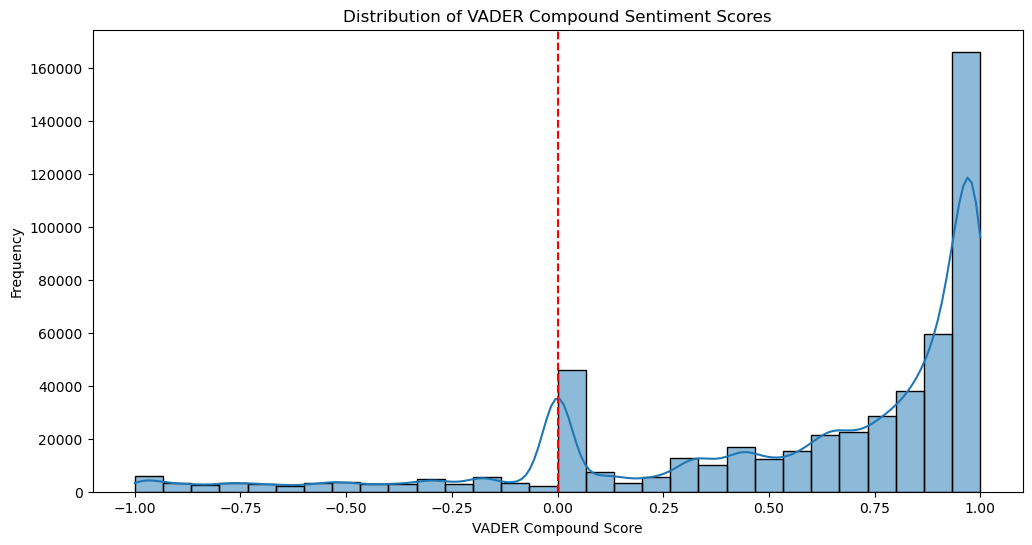

In [11]:

plt.figure(figsize=(12, 6))
sns.histplot(emails_df['vader_compound'], bins=30, kde=True)
plt.title('Distribution of VADER Compound Sentiment Scores')
plt.xlabel('VADER Compound Score')
plt.ylabel('Frequency')
plt.axvline(0, color='red', linestyle='--')  # Neutral threshold
plt.show()


In [12]:

def classify_sentiment(row):
    if row['vader_compound'] >= 0.05:
        return 'Positive'
    elif row['vader_compound'] <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'


emails_df['vader_sentiment'] = emails_df.apply(classify_sentiment, axis=1)


sentiment_counts_vader = emails_df['vader_sentiment'].value_counts()
print(sentiment_counts_vader)


vader_sentiment
Positive    421118
Negative     50145
Neutral      46138
Name: count, dtype: int64


<Figure size 1400x700 with 0 Axes>

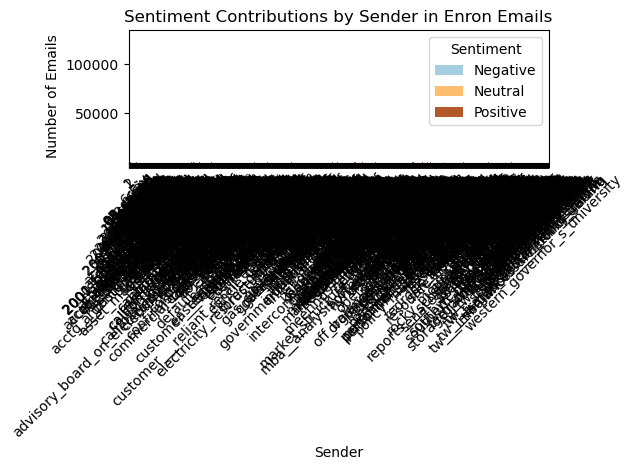

In [13]:

emails_df['sender'] = emails_df['file'].apply(lambda x: x.split('/')[1])  


sender_sentiment_counts = emails_df.groupby(['sender', 'vader_sentiment']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 7))
sender_sentiment_counts.plot(kind='bar', stacked=True, colormap='Paired')
plt.title('Sentiment Contributions by Sender in Enron Emails')
plt.xlabel('Sender')
plt.ylabel('Number of Emails')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.tight_layout()
plt.show()
